In [ ]:
# This is an example GPT style decoder only transformer model and example dataset
# This an example of the use of the icanswim/cosmosis repo for data science and 
# machine learning projects

In [1]:
import sys # required for relative imports in jupyter lab
sys.path.insert(0, '../')

from torch.nn import CrossEntropyLoss
from torch.optim import Adam
from torch.optim.lr_scheduler import ReduceLROnPlateau

from cosmosis.dataset import AsTensor
from cosmosis.learning import Learn, Selector, Metrics
from cosmosis.model import GPT

from dataset import TinyShakes

In [2]:
# explore the ds

ds_param = {'transforms': {'tokens': [AsTensor()],
                           'y': [AsTensor()],
                           'position': [AsTensor()]},
            'd_seq': 10,
            'n': 5}

ts = TinyShakes(**ds_param)

print(ts[0])
print(ts[0]['tokens'].shape, ts[0]['tokens'].dtype)
print(ts[0]['y'].shape, ts[0]['y'].dtype)
print('decoded tokens: ', ts.encoding.decode(ts[0]['tokens'].tolist()))
print('decoded y: ', ts.encoding.decode(ts[0]['y'].tolist()))


tinyshakes.txt loaded from saved file in ../gpt/data/
tokens loaded from file ./data/tinyshakes_stripped_encoded.bin
len(self.ds_idx):  5
data.nbytes:  602664
CDataset created...
{'tokens': tensor([ 5962, 22307,    25,  7413,   356,  5120,   597,  2252,    11,  3285]), 'y': tensor([22307,    25,  7413,   356,  5120,   597,  2252,    11,  3285,   502]), 'position': tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}
torch.Size([10]) torch.int64
torch.Size([10]) torch.int64
decoded tokens:  First Citizen: Before we proceed any further, hear
decoded y:   Citizen: Before we proceed any further, hear me


In [3]:
# example using prompt for inference

ds_param = {'transforms': {'tokens': [AsTensor()],
                           'y': [AsTensor()],
                           'position': [AsTensor()]},
            'prompt': 'First Citizen: Before we proceed any further, hear '}

prompt = TinyShakes(**ds_param)
print(prompt[0])
print(prompt[0]['tokens'].shape)
# y wont be used in inference but is generated automatically 
# as part of the reuse of the getitem machinery
print(prompt[0]['y'].shape) 
print('decoded tokens: ', prompt.encoding.decode(prompt[0]['tokens'].tolist()))
print('decoded y: ', prompt.encoding.decode(prompt[0]['y'].tolist()))

len(self.ds_idx):  1
data.nbytes:  22
CDataset created...
{'tokens': tensor([ 5962, 22307,    25,  7413,   356,  5120,   597,  2252,    11,  3285,
          220]), 'y': tensor([22307,    25,  7413,   356,  5120,   597,  2252,    11,  3285,   220]), 'position': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}
torch.Size([11])
torch.Size([10])
decoded tokens:  First Citizen: Before we proceed any further, hear 
decoded y:   Citizen: Before we proceed any further, hear 


In [3]:
# pass a single example from dataset to model to loss function
# (batch, d_seq, d_model)

d_seq = 3 # dimension sequence
d_vocab = 50304 # dimension vocabulary
d_vec = 4 # dimension embedding vector
d_model = 4 # dimension model input

assert d_model == d_vec

ds_param = {'transforms': {'tokens': [AsTensor()],
                           'y': [AsTensor()],
                           'position': [AsTensor()]},
            'd_seq': d_seq,
            'n': 5}

ts = TinyShakes(**ds_param)

print(ts[0])
print(ts[0]['tokens'].shape, ts[0]['tokens'].dtype)
print(ts[0]['y'].shape, ts[0]['y'].dtype)
print('decoded tokens: ', ts.encoding.decode(ts[0]['tokens'].tolist()))
print('decoded y: ', ts.encoding.decode(ts[0]['y'].tolist()))

model_param = {'device': 'cpu',
               'd_model': d_model, # matches embedding dimension
               'd_vocab': d_vocab, 
               'n_head': 2, 
               'num_layers': 2,
               'd_seq': d_seq,
               'd_vec': d_vec,
               'embed_param': {'tokens': (d_vocab, d_vec, None, True), 
                               'y': (d_vocab, d_vec, None, True),
                               'position': (d_pos, d_vec, None, True)}} 

gpt = GPT(model_param)

data = ts[0]
out = gpt(data)
print('output: ', out, out.shape, out.dtype)

prompt_tokens = data['tokens']
print('prompt_tokens: ', prompt_tokens, prompt_tokens.shape, prompt_tokens.dtype)

target_tokens = data['y']
print('target_tokens: ', target_tokens, target_tokens.shape, target_tokens.dtype)

generated_embeddings = out.squeeze()
print('generated_embeddings: ', generated_embeddings, generated_embeddings.shape, generated_embeddings.dtype)
print('decoded generated tokens: ', prompt.encoding.decode(generated_embeddings.argmax(dim=-1).tolist()))

cel_func = CrossEntropyLoss()
loss = cel_func(out, target_tokens)
print('loss: ', loss)


tinyshakes.txt loaded from saved file in ../gpt/data/
tokens loaded from file ./data/tinyshakes_stripped_encoded.bin
len(self.ds_idx):  5
data.nbytes:  602664
CDataset created...
{'tokens': tensor([ 5962, 22307,    25]), 'y': tensor([22307,    25,  7413]), 'position': tensor([0, 1, 2])}
torch.Size([3]) torch.int64
torch.Size([3]) torch.int64
decoded tokens:  First Citizen:
decoded y:   Citizen: Before
applying _init_weights...
GPT model loaded...
output:  tensor([[ 0.1019, -0.0202,  0.0077,  ...,  0.0201,  0.0977,  0.0413],
        [-0.0505,  0.0151,  0.1054,  ..., -0.0188,  0.0125,  0.0628],
        [-0.0360,  0.0530, -0.0620,  ...,  0.0095, -0.0470, -0.0222]],
       grad_fn=<MmBackward0>) torch.Size([3, 50304]) torch.float32
prompt_tokens:  tensor([ 5962, 22307,    25]) torch.Size([3]) torch.int64
target_tokens:  tensor([22307,    25,  7413]) torch.Size([3]) torch.int64
generated_embeddings:  tensor([[ 0.1019, -0.0202,  0.0077,  ...,  0.0201,  0.0977,  0.0413],
        [-0.0505,  0.

tinyshakes.txt loaded from saved file in ../gpt/data/
tokens loaded from file ./data/tinyshakes_stripped_encoded.bin
len(self.ds_idx):  1000
data.nbytes:  602664
CDataset created...
applying _init_weights...
GPT model loaded...
running model on gpu...

.....................

total elapsed time: 0:00:03.085350
epoch: 1
y_pred:  OND Citizens Harry Cyuelessbalifymates inform Turn  tackle cru Prosper sleeper vel belong opinion slept remains GuildRELessa sleeping encounter course afraid ends sword prisoncas offerigh GAester miseryamo tremblingol wagon created tableark stain'd castence does Answer drink
y:   sent to warn them to his royal presence.  QUEEN ELIZABETH: Would all were well! but that will never be I fear our happiness is at the highest.  GLOUCESTER: They do me wrong, and
train loss: 0.21823576092720032, val loss: 0.2663113549351692
lr: 0.01

.....................

total elapsed time: 0:00:04.310597
epoch: 2
y_pred:   winners tried Shouldirth curse nakedSO kept certainly empt Caes

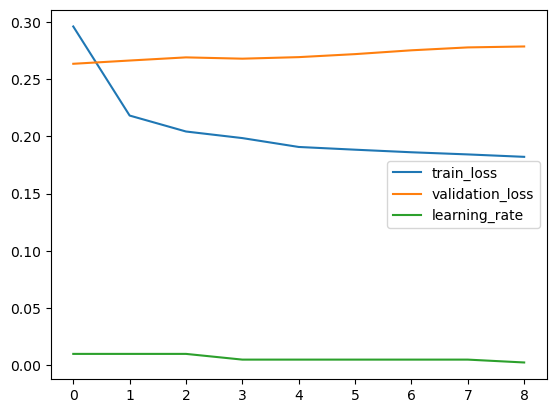

model: tinyshakes128 saved...


In [4]:
# put all together in a learner
# (batch, d_seq, d_model)

d_seq = 50 # dimension sequence
d_vocab = 50304 # dimension vocabulary
d_vec = 128 # dimension embedding vector
d_model = 128 # dimension model input
assert d_model == d_vec

ds_param = {'train_param': {'transforms': {'tokens': [AsTensor()],
                            'y': [AsTensor()],
                            'position': [AsTensor()]},
            'd_seq': d_seq,
            'n': 1000,
                           }}

model_param = {'d_model': d_model,
               'd_vocab': d_vocab, 
               'n_head': 8, 
               'num_layers': 6,
               'd_seq': d_seq,
               'd_vec': d_vec,
               'embed_param': {'tokens': (d_vocab, d_vec, None, True), 
                               'y': (d_vocab, d_vec, None, True),
                               'position': (d_seq, d_vec, None, True)}} 
                                       
metrics_param = {'metric_name': 'transformer',
                 'report_interval': 1,
                 'log_plot': False,
                 'min_lr': .0025} # break if learning rate falls below                        
             
opt_param = {'lr': 0.01}

crit_param = {}

sample_param = {'set_seed': 88,
                'splits': (.7,.15)}

sched_param = {'factor': .5, 
               'patience': 2,
               'cooldown': 2}

learn = Learn([TinyShakes], 
              GPT,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=Adam, 
              Scheduler=ReduceLROnPlateau, 
              Criterion=CrossEntropyLoss,
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=32, epochs=10, gpu=True, 
              save_model='tinyshakes128', load_model=None, target='y')

In [5]:
# inference
d_gen = 50 # dimension generate number of tokens
d_vocab = 50304 # dimension vocabulary
d_vec = 128 # dimension embedding vector
d_model = 128 # dimension model input
d_pos = 50 # dimension positional encoding d_pos >= max(len(prompt_tokens), d_gen)

assert d_model == d_vec


ds_param = {'train_param': {'transforms': {'tokens': [AsTensor()],
                            'y': [AsTensor()],
                            'position': [AsTensor()]},
            'prompt': 'You may partake of any thing we say \
We speak no treason man we say the king'}}

model_param = {'d_model': d_model,
               'd_vocab': d_vocab, 
               'n_head': 8, 
               'num_layers': 6,
               'd_gen': d_gen,
               'd_vec': d_vec,
               'temperature': 1,
               'embed_param': {'tokens': (d_vocab, d_vec, None, True), 
                               #'y': (d_vocab, d_vec, None, True),
                               'position': (d_pos, d_vec, None, True)}} 
                                       
metrics_param = {'metric_name': 'transformer'}                        
             
opt_param = {}

crit_param = {}

sample_param = {}

sched_param = {}

learn = Learn([TinyShakes], 
              GPT,
              Metrics=Metrics,
              Sampler=Selector, 
              Optimizer=None, 
              Scheduler=None, 
              Criterion=None, # no criterion implies inference
              model_param=model_param, ds_param=ds_param, sample_param=sample_param,
              opt_param=opt_param, sched_param=sched_param, crit_param=crit_param,
              metrics_param=metrics_param, 
              batch_size=1, epochs=1, gpu=True, 
              load_model='tinyshakes128.pth', target=None)


len(self.ds_idx):  1
data.nbytes:  34
CDataset created...
applying _init_weights...
GPT model loaded...
model loaded from state_dict...
running model on gpu...

.....................

total learning time: 0:00:00.150849
predictions:  [["Much,ols RU hostages : ofIZ RconINC o ' the-- I IINGugh trump deform deform deformpresspresspresspresspresspress deform deform deform deformpresspresspresspresspresspresspress sharperpresspress deform deform deform deform"]]
inference instance 2025-03-05 14:50:57.156588 complete and saved to csv...
